In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key
from keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)

1cc89202e555079b554803092d2bff0b


In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
smaller = cities[0:10]
weather_results = []

print('Beginning Data Retrieval')     
print('-----------------------------')
for i in range(0, 10):
    lat_long = lat_lngs[i]
    lat = lat_long[0]
    long = lat_long[1]
    city = cities[i]
    print(f'Processing Record {i} | {city} at {lat}, {long}')
    time.sleep(2)
    response = requests.get(f'http://api.openweathermap.org/data/2.5/weather?units=imperial&lat={lat}&lon={long}&APPID={api_key}')
    if response.status_code == 200:
        json = response.json()
        temp_max = json['main']['temp_max']
        humidity = json['main']['humidity']
        wind_speed = json['wind']['speed']
        cloudiness = json['clouds']['all']
        latitude = json['coord']['lat']
        longitude = json['coord']['lon']
        country = json['sys'].get('country', 'N/A')
        dt = json['dt']
        weather_results.append({ 'city': city, 'cloudiness': cloudiness, 'country': country, 'date': dt, 'humidity': humidity, 'lat': latitude, 'lng': longitude, 'max_temp': temp_max, 'max_speed': wind_speed})
    else:
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')     
print('-----------------------------')
                            

Beginning Data Retrieval
-----------------------------
Processing Record 0 | bontang at 1.6302329767003556, 116.58658160641232
Processing Record 1 | hermanus at -60.71063501609389, 3.6750936284595923
Processing Record 2 | dharan at 27.022617834922656, 86.85602434875199
Processing Record 3 | zavodoukovsk at 56.455691392865305, 66.3846181445752
Processing Record 4 | butaritari at 9.623533983707901, 179.08283149667506
Processing Record 5 | yellowknife at 79.37088758900026, -101.9863777549573
Processing Record 6 | hilo at 4.559190021547181, -164.3890424508255
Processing Record 7 | ahipara at -32.67290839382413, 170.06151616495987
Processing Record 8 | kanniyakumari at 7.333827386233324, 78.2810997034814
Processing Record 9 | djibo at 14.781864312738108, -1.6657223649783646
-----------------------------
Data Retrieval Complete
-----------------------------


In [4]:
with open(output_data_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')

    # Write the first row (column headers)
    csvwriter.writerow(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

    # Write the second row
    for weather_dictionary in weather_results:
        csvwriter.writerow([weather_dictionary['city'], weather_dictionary['cloudiness'], weather_dictionary['country'], weather_dictionary['date'], weather_dictionary['humidity'], weather_dictionary['lat'], weather_dictionary['lng'], weather_dictionary['max_temp'], weather_dictionary['max_speed']])


In [5]:
weather_df = pd.DataFrame(weather_results)
weather_df.head()

,city,cloudiness,country,date,humidity,lat,lng,max_speed,max_temp
0,bontang,100,ID,1570481011,95,1.63,116.59,2.98,65.59
1,hermanus,100,N/A,1570481013,93,-60.72,3.68,29.51,17.58
2,dharan,0,NP,1570481015,90,27.02,86.86,3.69,67.14
3,zavodoukovsk,0,RU,1570481018,86,56.46,66.38,4.79,47.84
4,butaritari,100,N/A,1570481020,69,9.62,179.08,4.07,84.44


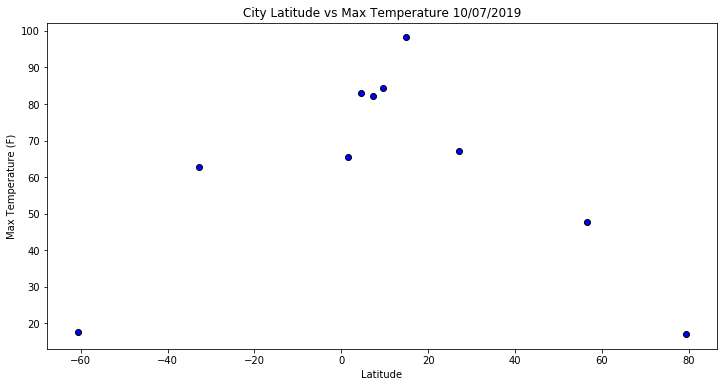

In [6]:
# Latitude vs. Temperature Plot
lat_temp = weather_df.copy()[['lat', 'max_temp']]
plt.figure(figsize=(12, 6))
plt.scatter(lat_temp['lat'], lat_temp['max_temp'], marker="o", facecolors="blue", edgecolors="black")
plt.title('City Latitude vs Max Temperature 10/07/2019')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../WeatherPy/City-Latitude-vs-Max-Temperature.png")
plt.show()

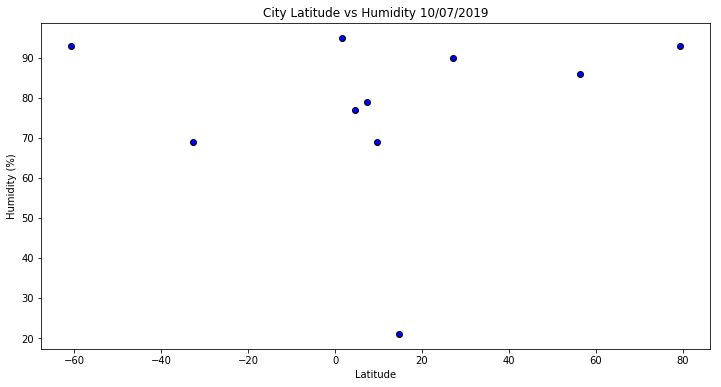

In [7]:
# Latitude vs. Humidity Plot
lat_humidity = weather_df.copy()[['lat', 'humidity']]
plt.figure(figsize=(12, 6))
plt.scatter(lat_humidity['lat'], lat_humidity['humidity'], marker="o", facecolors="blue", edgecolors="black")
plt.title('City Latitude vs Humidity 10/07/2019')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../WeatherPy/City-Latitude-vs-Humidity.png")
plt.show()

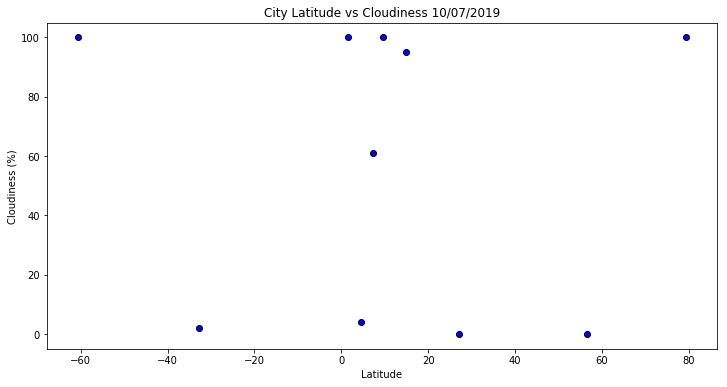

In [8]:
# Latitude vs. Humidity Plot
lat_cloudiness = weather_df.copy()[['lat', 'cloudiness']]
plt.figure(figsize=(12, 6))
plt.scatter(lat_cloudiness['lat'], lat_cloudiness['cloudiness'], marker="o", facecolors="blue", edgecolors="black")
plt.title('City Latitude vs Cloudiness 10/07/2019')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../WeatherPy/City-Latitude-vs-Cloudiness.png")
plt.show()

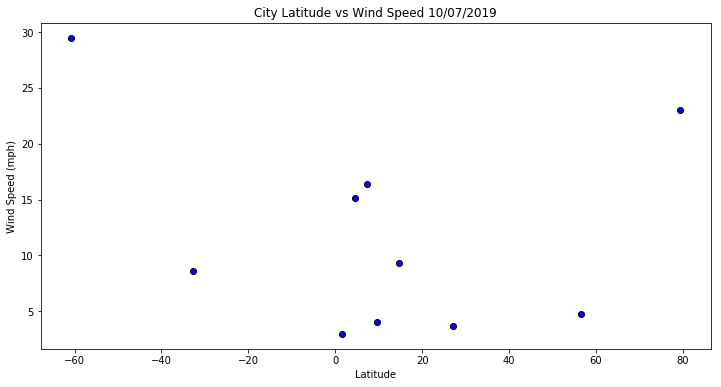

In [9]:
# Latitude vs. Windspeed Plot
lat_wind_speed = weather_df.copy()[['lat', 'max_speed']]
plt.figure(figsize=(12, 6))
plt.scatter(lat_wind_speed['lat'], lat_wind_speed['max_speed'], marker="o", facecolors="blue", edgecolors="black")
plt.title('City Latitude vs Wind Speed 10/07/2019')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../WeatherPy/City-Latitude-vs-Wind-Speed.png")
plt.show()